Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel $\rightarrow$ Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell $\rightarrow$ Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [16]:
NAME = "JAKUB ANTCZAK"

---

# Wnioskowanie Bayesowskie i metody aproksymacyjne

## Wnioskowanie Bayesowskie: aktualizacja wiedzy na podstawie danych

Podstawą wnioskowania bayesowskiego jest aktualizacja naszej wiedzy lub przekonań na temat parametrów modelu ($\theta$) w świetle zaobserwowanych danych ($D$). Proces ten formalizuje **Twierdzenie Bayesa**:

$$ P(\theta | D) = \frac{P(D | \theta) P(\theta)}{P(D)} $$

Poszczególne składniki tego równania mają swoje nazwy i interpretacje, które poznaliście juz na wcześniejszych zajęcia.
W ramach przypomnienia:

* **Rozkład a posteriori ($P(\theta | D)$)**: Nasza zaktualizowana wiedza (rozkład prawdopodobieństwa) o parametrach $\theta$ *po* uwzględnieniu danych $D$. To jest główny cel wnioskowania bayesowskiego.
* **Wiarygodność (Likelihood) ($P(D | \theta)$)**: Funkcja opisująca, jak prawdopodobne jest zaobserwowanie danych $D$ przy założeniu konkretnych wartości parametrów $\theta$. Reprezentuje informację zawartą w danych.
* **Rozkład a priori ($P(\theta)$)**: Nasza początkowa wiedza lub przekonania na temat parametrów $\theta$ *przed* zobaczeniem danych. Może być informatywny (oparty na wcześniejszej wiedzy) lub nieinformatywny (wyrażający minimalne założenia).
* **Wiarygodność brzegowa (Evidence / Marginal Likelihood) ($P(D)$)**: Prawdopodobieństwo zaobserwowania danych $D$ uśrednione po wszystkich możliwych wartościach parametrów $\theta$:
$$ P(D) = \int P(D | \theta) P(\theta) d\theta $$
Pełni rolę stałej normalizującej, zapewniając, że całka z rozkładu a posteriori po $\theta$ wynosi 1.

Głównym celem jest scharakteryzowanie rozkładu a posteriori $P(\theta | D)$, który dostarcza pełnego opisu niepewności co do parametrów $\theta$ po analizie danych.

## Metody aproksymacyjne

W praktyce, dla wielu interesujących modeli, obliczenie wiarygodności brzegowej $P(D)$ jest niezwykle trudne lub wręcz niemożliwe. Całkowanie po często wielowymiarowej przestrzeni parametrów $\theta$ jest analitycznie niewykonalne. To sprawia, że bezpośrednie wyznaczenie postaci rozkładu a posteriori $P(\theta | D)$ jest niemożliwe.

W takich sytuacjach musimy uciec się do **metod aproksymacyjnego wnioskowania bayesowskiego**. Istnieją dwie główne rodziny takich metod:

1.  **Wnioskowanie wariacyjne (Variational Inference - VI)**: Jak wiecie z poprzednich zajęć, VI przekształca problem wnioskowania w problem optymalizacji. Zakładamy pewną prostszą, parametryzowaną rodzinę rozkładów $q_{\phi}(\theta)$ (np. rozkłady normalne) i szukamy takiego rozkładu $q^*_{\phi}(\theta)$ z tej rodziny, który jest "najbliższy" prawdziwemu rozkładowi a posteriori $P(\theta | D)$ (zazwyczaj minimalizując dywergencję Kullbacka-Leiblera $KL(q || P)$). VI dostarcza analitycznej aproksymacji rozkładu a posteriori, często szybciej niż metody próbkowania, ale kosztem potencjalnego błędu wynikającego z ograniczeń narzuconych przez wybór rodziny $q$.

2.  **Metody próbkowania (sampling methods), w tym MCMC**: Alternatywne podejście polega na wygenerowaniu zbioru próbek $\{\theta^{(1)}, \theta^{(2)}, ..., \theta^{(N)}\}$, które pochodzą bezpośrednio z (lub są asymptotycznie rozłożone zgodnie z) docelowym rozkładem a posteriori $P(\theta | D)$. Zamiast szukać analitycznej formy $P(\theta | D)$, uzyskujemy jego dyskretną reprezentację w postaci próbek. Mając te próbki, możemy aproksymować różne charakterystyki rozkładu (np. wartość oczekiwaną, wariancję, kwantyle) za pomocą średnich Monte Carlo.


## Metody Monte Carlo oparte na Łańcuchach Markowa (MCMC)


Główną klasą algorytmów radzących sobie z tym problemem są metody **Monte Carlo oparte na Łańcuchach Markowa (MCMC)**. Pozwalają one generować próbki z docelowego rozkładu $P(x)$ (gdzie $x$ reprezentuje parametry $\theta$), nawet jeśli znamy ten rozkład tylko z dokładnością do stałej normalizującej ($P(x) \propto \tilde{P}(x)$, gdzie $\tilde{P}(x)$ potrafimy obliczyć).

![mcmc](/content/assets/mcmc.png)


Idea MCMC polega na skonstruowaniu **łańcucha Markowa**, czyli sekwencji stanów (próbek) $x^{(0)}, x^{(1)}, x^{(2)}, ...$, w której następny stan $x^{(t+1)}$ zależy probabilistycznie tylko od stanu bieżącego $x^{(t)}$. Łańcuch ten jest projektowany w taki sposób, aby jego **rozkład stacjonarny** (rozkład, do którego zbiega rozkład stanów $x^{(t)}$ dla $t \to \infty$) był dokładnie równy docelowemu rozkładowi $P(x)$. Mając próbki $x^{(t)}$ z tego łańcucha, możemy traktować je jako próbki z rozkładu $P(x)$ i używać ich do aproksymacji jego własności.


## Algorytm Metropolisa-Hastingsa

Algorytm **Metropolisa-Hastingsa** jest ogólną metodą konstrukcji takiego łańcucha Markowa. Proces generowania następnego stanu $x^{(t+1)}$ na podstawie bieżącego $x^{(t)}$ składa się z dwóch kroków:

### Krok propozycji

Generujemy *kandydata* na następny stan, oznaczanego jako $x'$, na podstawie **rozkładu propozycji** $Q(x' | x^{(t)})$. Rozkład ten wybieramy sami, natomiast musi to być rozkład, z którego potrafimy łatwo próbkować. Zauważ, że rozkład, z którego próbkujemy, bedzię zależał od obecnego stanu łańcucha Markowa, $x^{(t)}$.

Typowym sposobem jest użycie rozkładu normalnego skoncentrowanego na obecnym stanie $x^{(t)}$. Formalnie zapisujemy to jako:

$$x' | x^{(t)} \sim \text{Normal}(x^{(t)}, \sigma^2)$$

dla pewnego odchylenia standardowego $\sigma$, które wybieramy z góry. Innymi słowy, propozycja jest generowana przez dodanie losowego szumu do bieżącego stanu. Ważne jest, aby rozkład propozycji pozwalał (przynajmniej w teorii) dotrzeć do dowolnego stanu docelowego z dowolnego innego stanu (warunek ergodyczności).

Ciekawostka: Metody Monte Carlo tego rodzaju stosowali Enrico Fermi i Stanisław Ulam w trakcie tajnych prac nad Projektem Manhattan.

### Krok akceptacji-odrzucenia

Wygenerowany kandydat $x'$ nie jest automatycznie akceptowany jako $x^{(t+1)}$. Akceptujemy go z pewnym prawdopodobieństwem, zwanym **prawdopodobieństwem (lub współczynnikiem) akceptacji** $\alpha(x', x^{(t)})$. Jest ono zdefiniowane tak, aby zapewnić, że łańcuch zbiegnie do docelowego rozkładu $P(x)$ (poprzez spełnienie warunku szczegółowej równowagi). Ogólna formuła Metropolis-Hastings dla prawdopodobieństwa akceptacji to:

$$ \alpha_{MH}(x', x^{(t)}) = \min \left( 1, \frac{P(x')}{P(x^{(t)})} \times \frac{Q(x^{(t)} | x')}{Q(x' | x^{(t)})} \right) $$

Gdzie:
* $P(x')$ i $P(x^{(t)})$ to wartości (nieznormalizowanej) gęstości docelowej w punkcie kandydata i punkcie bieżącym. Kluczowe jest, że stosunek $P(x') / P(x^{(t)})$ nie zależy od stałej normalizacyjnej dla rozkładu. Innymi słowy, całka w pierwszym równaniu jest całkowicie nieistotna i możemy ją zignorować.
* $Q(x' | x^{(t)})$ to gęstość prawdopodobieństwa zaproponowania $x'$ będąc w $x^{(t)}$.
* $Q(x^{(t)} | x')$ to gęstość prawdopodobieństwa zaproponowania "wstecz" stanu $x^{(t)}$ będąc w stanie $x'$. Ten człon jest potrzebny, gdy rozkład propozycji jest *niesymetryczny*.

Po obliczeniu $\alpha_{MH}(x', x^{(t)})$, generujemy liczbę losową $u \sim \text{Uniform}(0, 1)$. Następny stan łańcucha jest wybierany zgodnie z regułą:

$$ x^{(t+1)} = \begin{cases} x' & \text{jeśli } u \leq \alpha_{MH}(x', x^{(t)}) \quad \text{(Akceptacja)} \\ x^{(t)} & \text{jeśli } u > \alpha_{MH}(x', x^{(t)}) \quad \text{(Odrzucenie)} \end{cases} $$
Jeśli propozycja jest odrzucana, łańcuch "stoi w miejscu" przez jeden krok, co oznacza, że próbka $x^{(t)}$ jest powtarzana w sekwencji.


## Algorytm Metropolisa

Algorytm **Metropolisa** (zaproponowany wcześniej niż ogólny M-H) jest **specjalnym, uproszczonym przypadkiem** algorytmu Metropolis-Hastings, który ma zastosowanie, gdy wybrany **rozkład propozycji $Q(x'|x)$ jest symetryczny**. Symetria oznacza, że:

$$ Q(x' | x^{(t)}) = Q(x^{(t)} | x') \quad \text{dla wszystkich } x', x^{(t)} $$
Innymi słowy, prawdopodobieństwo zaproponowania $x'$ z $x^{(t)}$ jest takie samo jak prawdopodobieństwo zaproponowania $x^{(t)}$ z $x'$.

Przykładem symetrycznego rozkładu propozycji jest wspomniany wcześniej **losowy spacer z rozkładem normalnym**, $x' \sim N(x^{(t)}, \sigma^2)$, ponieważ gęstość $N(x^{(t)}, \sigma^2)$ w punkcie $x'$ jest równa gęstości $N(x', \sigma^2)$ w punkcie $x^{(t)}$ (oba zależą tylko od kwadratu odległości $||x' - x^{(t)}||^2$).

Gdy $Q$ jest symetryczny, stosunek gęstości propozycji w formule M-H skraca się do jedności:
$$ \frac{Q(x^{(t)} | x')}{Q(x' | x^{(t)})} = 1 $$
Wówczas ogólny współczynnik akceptacji $\alpha_{MH}$ upraszcza się do **współczynnika akceptacji Metropolis**:
$$ \alpha_{M}(x', x^{(t)}) = \min \left( 1, \frac{P(x')}{P(x^{(t)})} \right) $$
Obliczenie tego współczynnika wymaga jedynie porównania wartości (nieznormalizowanej) gęstości docelowej dla kandydata i bieżącego stanu.

**W tym zadaniu implementujesz właśnie algorytm Metropolisa**, ponieważ jako rozkład propozycji użyjesz wielowymiarowego rozkładu normalnego centrującego się w aktualnym punkcie ($x' \sim N(x^{(t)}, \sigma^2)$), który jest symetryczny.

## Aspekty praktyczne

* **Praca na logarytmach:** Aby uniknąć problemów numerycznych (underflow/overflow) przy mnożeniu małych prawdopodobieństw, wszystkie obliczenia związane ze współczynnikiem akceptacji wykonuje się w przestrzeni logarytmicznej.
    Dla **Metropolis**, obliczamy logarytm stosunku gęstości:
    $$ \log \left( \frac{P(x')}{P(x^{(t)})} \right) = \log P(x') - \log P(x^{(t)}) $$
    Logarytm współczynnika akceptacji Metropolis wynosi:
    $$ \log \alpha_{M}(x', x^{(t)}) = \log \left( \min \left(1, \frac{P(x')}{P(x^{(t)})} \right) \right) = \min \left( 0, \log P(x') - \log P(x^{(t)}) \right) $$
    Krok akceptacji-odrzucenia w skali logarytmicznej polega na wylosowaniu $v \sim \text{Uniform}(0, 1)$ i sprawdzeniu, czy:
    $$ \log v < \log \alpha_{M}(x', x^{(t)}) $$
    (Zauważ, że $\log v$ jest liczbą ujemną).

* **Burn-in (faza wstępna):** Początkowe próbki łańcucha ($x^{(0)}, x^{(1)}, ..., x^{(M-1)}$) mogą silnie zależeć od arbitralnego stanu początkowego $x^{(0)}$ i nie odzwierciedlać jeszcze rozkładu stacjonarnego $P(x)$. Dlatego te pierwsze $M$ próbek, zwanych fazą *burn-in*, zazwyczaj odrzuca się przed przystąpieniem do analizy wyników.

* **Tuning rozkładu propozycji:** Wybór parametrów rozkładu propozycji (np. $\sigma$ lub macierz $\Sigma$ w propozycji losowego spaceru) ma kluczowe znaczenie dla efektywności algorytmu.
    * Zbyt małe kroki (małe $\sigma$): Prawie każda propozycja będzie akceptowana ($\alpha \approx 1$), ale łańcuch będzie bardzo wolno eksplorował przestrzeń stanu (wysoka autokorelacja między kolejnymi próbkami).
    * Zbyt duże kroki (duże $\sigma$): Propozycje często będą trafiać w obszary o niskim prawdopodobieństwie $P(x')$, co prowadzi do częstych odrzuceń (niskie $\alpha$). Łańcuch będzie "stał w miejscu".
    * Optymalna stopa akceptacji (procent zaakceptowanych kroków) często leży w zakresie 20-50% i zależy od problemu oraz wymiarowości przestrzeni. Dostrojenie parametrów propozycji jest ważnym krokiem praktycznym.


## Zadanie 1 (3p.): Implementacja algorytmu Metropolis-Hastings

Zaimplementuj własny sampler MCMC, który używa **algorytmu Metropolisa**. Jako **symetryczny rozkład propozycji** wykorzystaj wielowymiarowy rozkład normalny $N(x^{(t)}, \Sigma)$ z **diagonalną** macierzą kowariancji $\Sigma = \text{diag}(\sigma^2)$. Oznacza to, że nowa propozycja $x'$ jest generowana z rozkładu normalnego $N(x^{(t)}, \Sigma)$, gdzie $x^{(t)}$ to aktualny stan łańcucha, a $\sigma$ to odchylenie standardowe.

Zaimplementuj dwie funkcje w Pythonie:

- `metropolis_step` (1.5p.): Wykonuje jeden krok łańcucha Markowa: proponuje nowy stan za pomocą symetrycznego rozkładu propozycji, oblicza współczynnik akceptacji Metropolis i decyduje o przejściu do nowego stanu lub pozostaniu w obecnym.
   1.  Zaproponuj nowy stan `proposed_x` z $N(\text{current\_x}, \text{diag}(\sigma^2))$.
   2.  Oblicz log-prawdopodobieństwo `proposed_log_prob`.
   3.  Oblicz log-współczynnik akceptacji Metropolis: `min(0, proposed_log_prob - current_log_prob)`.
   4.  Zaakceptuj lub odrzuć propozycję na podstawie współczynnika i losowej liczby z $U(0,1)$.
   5.  Zwróć nowy stan (`new_x`), jego log-prawdopodobieństwo (`new_log_prob`) oraz flagę akceptacji (`accepted`).


- `metropolis_sampler` (1.5p.): Funkcja wykorzystująca `metropolis_step` do wygenerowania sekwencji próbek z rozkładu docelowego.
   1.  Zainicjalizuj łańcuch (stan, log-prawdopodobieństwo).
   2.  Wykonaj pętlę przez `n_burnin + n_samples` kroków:
         - Wywołaj `metropolis_step`.
         - Zaktualizuj stan łańcucha.
         - Po fazie `n_burnin`, zapisuj stany i ich log-prawdopodobieństwa.
   3.  Oblicz i opcjonalnie wyświetl ogólną stopę akceptacji.
   4.  Sformatuj zapisane próbki (po burn-in) i log-prawdopodobieństwa w `pandas.DataFrame`.
   5.  Zwróć DataFrame.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
sns.set_style("whitegrid")

def metropolis_step(x, log_target_fn, current_log_target, proposal_std, args=()):
    """Performs one step of the Metropolis-Hastings MCMC algorithm.

    Uses a multivariate normal distribution with diagonal covariance matrix as the
    proposal distribution. Each parameter is proposed independently. This corresponds
    to the Metropolis algorithm due to the symmetric proposal distribution.

    Parameters
    ----------
    x : np.ndarray, shape (n_variables,)
        Current state of the chain in parameter space.
    log_target_fn : callable
        Function computing log probability of target distribution.
        Must have signature `log_target_fn(x, *args)`.
    current_log_target : float
        Log probability of current state under target distribution.
    proposal_std : np.ndarray, shape (n_variables,) or float
        Standard deviations for the normal proposal distribution,
        one per parameter. If float, used for all dimensions.
    args : tuple, optional
        Additional arguments passed to log_target_fn.

    Returns
    -------
    next_x : np.ndarray, shape (n_variables,)
        Next state of the chain. Equal to input x if proposal rejected.
    next_log_target : float
        Log probability of next state.
    accepted : bool
        Whether the proposal was accepted (True) or rejected (False).
    """
    x_proposed = x + np.random.normal(0, proposal_std, size=x.shape)
    log_target_proposed = log_target_fn(x_proposed, *args)
    log_alpha = min(0, log_target_proposed - current_log_target)
    if np.log(np.random.rand()) < log_alpha:
        return x_proposed, log_target_proposed, True
    else:
        return x, current_log_target, False
    #raise NotImplementedError()


def metropolis_sampler(
    log_target_fn, initial_x, proposal_std, args=(),
    n_burnin=1000, n_samples=1000, param_names=None,
    return_diagnostics=False
):
    """Generates samples using the Metropolis-Hastings MCMC algorithm.

    Uses a multivariate normal proposal distribution with diagonal covariance.
    Includes burn-in period and returns samples in a pandas DataFrame.

    Parameters
    ----------
    log_target_fn : callable
        Function computing log probability of target distribution.
        Must have signature `log_target_fn(x, *args)`.
    initial_x : np.ndarray, shape (n_variables,)
        Initial state of the chain in parameter space.
    proposal_std : np.ndarray, shape (n_variables,) or float
        Standard deviations for the normal proposal distribution,
        one per parameter. If float, used for all dimensions.
    args : tuple, optional
        Additional arguments passed to log_target_fn.
    n_burnin : int, default 1000
        Number of initial samples to discard (burn-in period).
    n_samples : int, default 1000
        Number of samples to generate *after* burn-in.
    param_names : list of str, optional
        Names of parameters. If None, uses integers 0, 1, 2,...
    return_diagnostics : bool, default False
        If True, return a dictionary containing diagnostics (e.g., acceptance rate)
        along with the samples DataFrame.

    Returns
    -------
    samples_df : pandas.DataFrame
        DataFrame containing generated samples (post-burn-in) with columns
        for each parameter plus a 'log_prob' column.
    diagnostics : dict, optional
        If return_diagnostics is True, a dictionary containing diagnostics
        of the MCMC run (e.g., {'acceptance_rate': float}).
    """
    initial_x = np.asarray(initial_x)
    n_variables = len(initial_x)

    if isinstance(proposal_std, (int, float)):
        proposal_std = np.full(n_variables, proposal_std)
    elif len(proposal_std) != n_variables:
         raise ValueError("Length of proposal_std must match length of initial_x")
    proposal_std = np.asarray(proposal_std)

    total_steps = n_burnin + n_samples

    samples_array = np.zeros((n_samples, n_variables))
    log_probs = np.zeros(n_samples)

    current_x = initial_x.copy()
    current_log_prob = log_target_fn(current_x, *args)
    n_accepted = 0

    # TU WPISZ KOD
    #raise NotImplementedError()
    for i in range(total_steps):
        current_x, current_log_prob, accepted = metropolis_step(
            current_x, log_target_fn, current_log_prob, proposal_std, args
        )
        if i >= n_burnin:
            samples_array[i - n_burnin] = current_x
            log_probs[i - n_burnin] = current_log_prob
            if accepted:
                n_accepted += 1

    acceptance_rate = n_accepted / total_steps

    if param_names is None:
        param_names = [f'param_{j}' for j in range(n_variables)]
    elif len(param_names) != n_variables:
        raise ValueError("Length of param_names must match the number of variables")

    samples_dict = {name: samples_array[:, j] for j, name in enumerate(param_names)}
    samples_dict['log_prob'] = log_probs
    samples_df = pd.DataFrame(samples_dict)

    if return_diagnostics:
        diagnostics = {
            'acceptance_rate': acceptance_rate,
            # Można tu dodać więcej diagnostyk w przyszłości
        }
        return samples_df, diagnostics
    else:
        return samples_df

# Weryfikacja działania algorytmu Metropolisa

W tym przykładzie przetestujemy działanie zaimplementowanego **algorytmu Metropolis** na znanym, dwuwymiarowym rozkładzie normalnym. Celem jest sprawdzenie, czy wygenerowane próbki MCMC poprawnie odzwierciedlają charakterystyki tego rozkładu, w szczególności jego wartość średnią i macierz kowariancji.

Porównamy teoretyczne (zadane) parametry rozkładu z wartościami estymowanymi na podstawie próbek uzyskanych z naszego samplera. Wykorzystamy również wizualizacje (histogramy, wykresy rozrzutu, ścieżki łańcucha) do oceny jakości próbkowania.


In [18]:
mu_true = np.array([10.0, 20.0])
cov_true = np.array([[4.0, -2.0], [-2.0, 6.0]])
inv_cov_true = np.linalg.inv(cov_true)

initial_x = np.array([0.0, 0.0])
proposal_std = np.array([1.0, 1.0])
n_burnin = 2000
n_samples = 5000
param_names = ['x1', 'x2']


def log_gaussian_pdf(x, mu, inv_cov):
    """
    Logarytm gęstości prawdopodobieństwa (do stałej) dla
    wielowymiarowego rozkładu normalnego.
    """
    diff = x - mu
    return -0.5 * diff.T @ inv_cov @ diff


samples_df = metropolis_sampler(
    log_target_fn=log_gaussian_pdf,
    initial_x=initial_x,
    proposal_std=proposal_std,
    n_samples=n_samples,
    n_burnin=n_burnin,
    param_names=param_names,
    args=(mu_true, inv_cov_true)
)

Prawdziwa średnia: [10. 20.]
Średnia z próbek: [10.06636391 20.05701302]

Różnica średnich: [-0.06636391 -0.05701302]

Prawdziwa kowariancja:
 [[ 4. -2.]
 [-2.  6.]]

Kowariancja z próbek:
 [[ 3.49421076 -1.83742044]
 [-1.83742044  5.63708284]]

Różnica kowariancji:
 [[ 0.50578924 -0.16257956]
 [-0.16257956  0.36291716]]


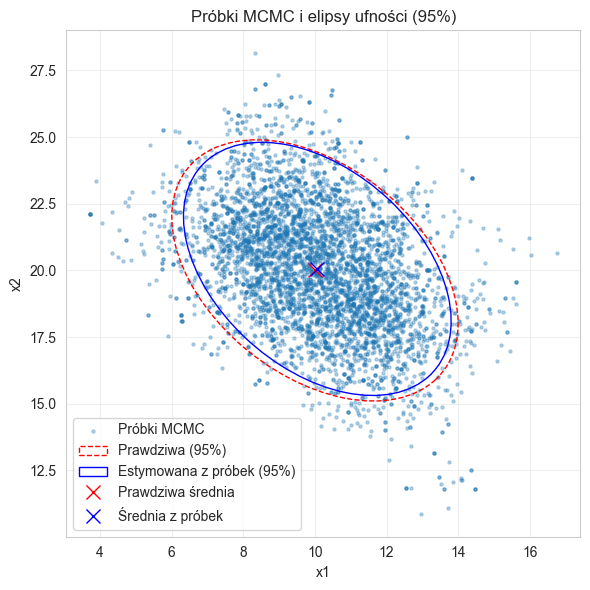

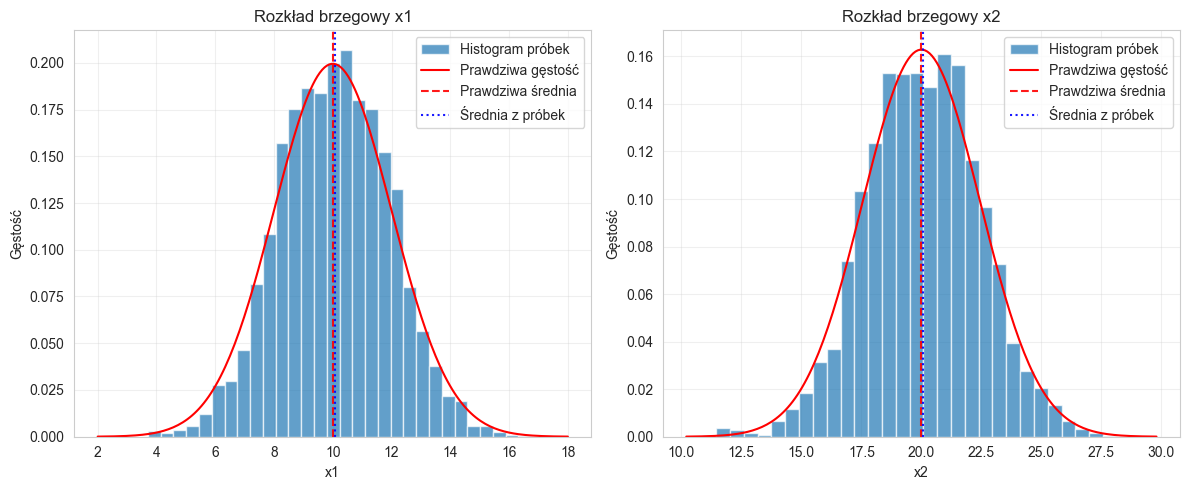

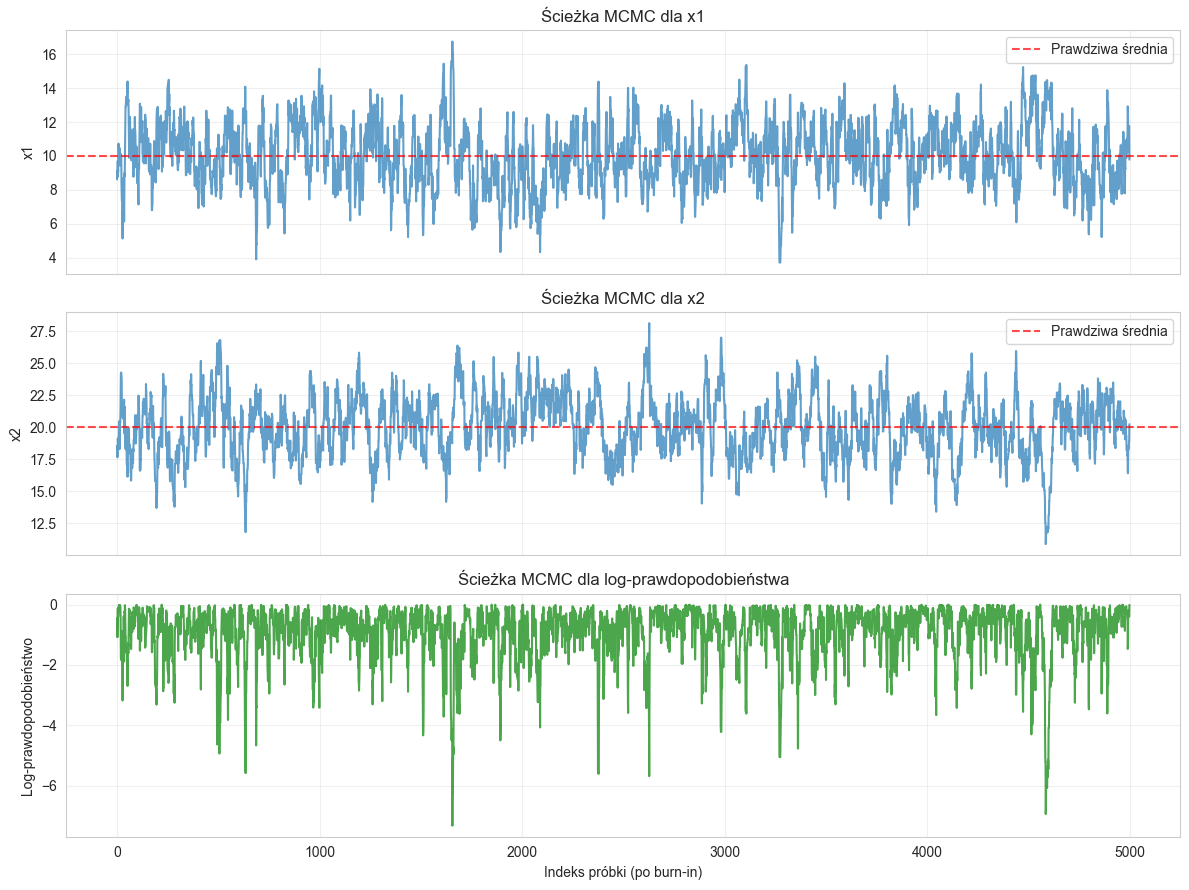

In [19]:
from src.plots import plot_mcmc_results

sample_mean = samples_df[param_names].mean().values
sample_cov = np.cov(samples_df[param_names].values.T)

print("Prawdziwa średnia:", mu_true)
print("Średnia z próbek:", sample_mean)
print("\nRóżnica średnich:", mu_true - sample_mean)
print("\nPrawdziwa kowariancja:\n", cov_true)
print("\nKowariancja z próbek:\n", sample_cov)
print("\nRóżnica kowariancji:\n", cov_true - sample_cov)

plot_mcmc_results(samples_df, mu_true, cov_true, param_names=param_names)

# Efektywna Wielkość Próby (ESS) w MCMC

Efektywna Wielkość Próby (ESS) to kluczowe pojęcie w próbkowaniu Markov Chain Monte Carlo (MCMC), które mierzy, ilu **niezależnym** próbkom odpowiada informacyjnie Twój łańcuch MCMC, biorąc pod uwagę autokorelację między próbkami.

## Dlaczego ESS jest ważne?

W MCMC kolejne próbki są z natury skorelowane, ponieważ każda nowa próbka zależy od poprzedniej. Ta autokorelacja zmniejsza "efektywną" ilość informacji niesioną przez próbki w porównaniu do sytuacji, gdyby były one losowane niezależnie z rozkładu docelowego.

Na przykład, jeśli wygenerujesz 1000 próbek MCMC, ale są one silnie skorelowane (łańcuch wolno się "miesza"), mogą one dostarczać takiej samej precyzji estymacji jak, powiedzmy, tylko 100 prawdziwie niezależnych próbek. W tym przypadku Twój ESS wynosiłby 100, mimo posiadania 1000 próbek.

## Jak oblicza się ESS?
Efektywna Wielkość Próby (ESS) mierzy liczbę niezależnych próbek w łańcuchu Markowa Monte Carlo (MCMC). Oblicza się ją na podstawie Zintegrowanego Czasu Autokorelacji (IAT). IAT definiuje się jako $\text{IAT} = 1 + 2\sum_{k=1}^{\infty}\rho_k$, gdzie $\rho_k$ to autokorelacja przy opóźnieniu $k$. Następnie ESS oblicza się jako $\text{ESS} = \frac{N}{\text{IAT}}$, gdzie $N$ to liczba próbek.

#### Implementacja obliczania ESS:

W praktyce sumę w IAT się przybliża. Implementacja wygląda następująco:

1.  Obliczenie autokorelacji próbek. Do obliczenia autokorelacji użyj funkcji acf z biblioteki statsmodels, o parametrze nlags = N//2.
2.  Zsumowanie dodatnich wartości autokorelacji (dla opóźnień większych od 0).
3.  Oszacowanie IAT jako: $\widehat{\text{IAT}} = 1 + 2 \times (\text{suma dodatnich autokorelacji})$.
4.  Obliczenie ESS jako: $\widehat{\text{ESS}} = N / \max(\widehat{\text{IAT}}, 1)$.

**UWAGA:** W przypadku, gdy mamy mniej niż 2 próbki lub wariancja próbek jest równa 0, ESS nie da się policzyć, więc funkcja powinna zwrócić wartość 0.

## Interpretacja ESS

* **ESS ≈ N**: Próbki są prawie nieskorelowane (sytuacja idealna, szybkie mieszanie łańcucha).
* **ESS << N**: Próbki są silnie skorelowane (wolne mieszanie łańcucha, niska efektywność).
* **Współczynnik ESS/N**: Miara efektywności samplera (im bliżej 1, tym lepiej).

Niski ESS wskazuje, że Twój łańcuch MCMC "miesza się" słabo - nie eksploruje efektywnie przestrzeni parametrów w stosunku do liczby wykonanych kroków. Może to być spowodowane:
* Źle dobranym rozkładem propozycji (np. zbyt małe lub zbyt duże kroki `sigma` w algorytmie Metropolis).
* Wysoką wymiarowością problemu.
* Złożoną geometrią rozkładu a posteriori (np. silne korelacje między parametrami, wąskie obszary wysokiego prawdopodobieństwa, multimodalność).

Poprawa ESS (przy zachowaniu akceptowalnego kosztu obliczeniowego na próbkę) jest często kluczowym celem podczas dostrajania algorytmów MCMC. Analiza ESS pomaga ocenić, czy uzyskaliśmy wystarczającą liczbę "efektywnych" próbek do wiarygodnego wnioskowania.

# Zadanie 2 (1p.): Badanie wpływu parametrów na efektywność MCMC

 W tym zadaniu zbadaj, jak różne parametry algorytmu Metropolis-Hastings wpływają na jego efektywność.
 Dokończ implementację funkcji, która:
 1. Bada wpływ różnych wartości proposal_std na współczynnik akceptacji i efektywną wielkość próbki ESS
 2. Analizuje wpływ punktu startowego (initial_x) na czas zbieżności (burn-in)
 3. Wizualizuje wyniki w postaci wykresów

In [20]:
import numpy as np


def calculate_mean_error(samples_df, mu_true, p_names):
    """
    Oblicza błąd estymacji średniej (norma euklidesowa).
    Zwraca np.nan jeśli DataFrame jest pusty lub ma mniej niż 2 próbki.

    Argumenty:
        samples_df (pd.DataFrame): Ramka danych z próbkami MCMC (po burn-in).
        mu_true (np.ndarray): Prawdziwy wektor średnich.
        p_names (list): Lista nazw kolumn parametrów.

    Zwraca:
        float: Błąd estymacji średniej.
    """
    if samples_df.empty or len(samples_df) < 2:
        print("Warning: Za mało próbek do obliczenia błędu średniej.")
        return np.nan

    # Oblicz średnią z próbek dla kolumn p_names (użyj .mean())
    p_names_mean = samples_df[p_names].mean()
    # Oblicz i zwróć normę euklidesową różnicy sample_mean i mu_true (użyj np.linalg.norm)
    mean_error = np.linalg.norm(p_names_mean - mu_true)

    # TU WPISZ KOD
    #raise NotImplementedError()

    return mean_error

def calculate_covariance_error(samples_df, cov_true, p_names):
    """
    Oblicza błąd estymacji macierzy kowariancji (norma Frobeniusa).
    Zwraca np.nan jeśli DataFrame jest pusty lub ma mniej niż 2 próbki.

    Argumenty:
        samples_df (pd.DataFrame): Ramka danych z próbkami MCMC (po burn-in).
        cov_true (np.ndarray): Prawdziwa macierz kowariancji.
        p_names (list): Lista nazw kolumn parametrów.

    Zwraca:
        float: Błąd estymacji kowariancji.
    """
    if samples_df.empty or len(samples_df) < 2:
        print("Warning: Za mało próbek do obliczenia błędu kowariancji.")
        return np.nan

    # blicz macierz kowariancji z próbek dla kolumn p_names
    # Użyj .cov() z pandas lub np.cov(..., rowvar=False, bias=False)
    cov = samples_df[p_names].cov()
    # Oblicz i zwróć normę Frobeniusa różnicy sample_cov i cov_true (użyj np.linalg.norm z ord='fro')
    cov_error = np.linalg.norm(cov - cov_true, ord='fro')
    # TU WPISZ KOD
    #raise NotImplementedError()

    return cov_error


def calculate_ess(trace):
    """
    Szacuje Efektywną Wielkość Próby (ESS) dla pojedynczej ścieżki parametru.
    """
    N = len(trace)
    if N < 2 or np.var(trace) == 0:
        return 0

    from statsmodels.tsa.stattools import acf

    # Oblicz autokorelację śladu dla połowy jego długości
    autocorr = acf(trace, nlags=N//2, fft=False)
    # Zsumuj dodatnie wartości autokorelacji
    sum = 0
    for i in range(1, len(autocorr)):
        if autocorr[i] > 0:
            sum += autocorr[i]
    # Oblicz IAT a następnie ESS
    IAT = 1 + 2 * sum
    ess = N / max(IAT, 1)
    # TU WPISZ KOD
    #raise NotImplementedError()
    return ess

In [21]:
from src.utils import analyze_mcmc_parameters

np.random.seed(42)

true_params = (mu_true, cov_true)
param_ranges = {
    'proposal_std': np.arange(0.1, 2.0, 0.2),
    'initial_x': [np.array([np.random.randint(-5, 15), np.random.randint(-5, 15)]) for _ in range(10)],
    'n_burnin': np.arange(100, 1000, 100),
    'n_samples': np.arange(500, 2500, 500)
}

# UWAGA: W analizie parametrów zostały uzyte wybrane domyślne wartości (defaults w `analyze_mcmc_parameters`).
# Przy zmianie zakresu parametrów zostaną zmienione równiez parametry domyślne co będzie miało wpływ na wyniki.
results = analyze_mcmc_parameters(
    metropolis_sampler=metropolis_sampler,
    calculate_mean_error=calculate_mean_error,
    calculate_covariance_error=calculate_covariance_error,
    calculate_ess=calculate_ess,
    log_target_fn=log_gaussian_pdf,
    true_params=true_params,
    param_ranges=param_ranges,
    param_names=['x1', 'x2'],
    args=(mu_true, cov_true)
)

Rozpoczynanie testów dla 'proposal_std'...


Testowanie proposal_std: 100%|██████████| 10/10 [00:00<00:00, 21.60it/s]



Rozpoczynanie testów dla 'initial_x'...


Testowanie initial_x: 100%|██████████| 10/10 [00:00<00:00, 18.49it/s]



Rozpoczynanie testów dla 'n_burnin'...


Testowanie n_burnin: 100%|██████████| 9/9 [00:00<00:00, 19.97it/s]



Rozpoczynanie testów dla 'n_samples'...


Testowanie n_samples: 100%|██████████| 4/4 [00:00<00:00, 22.72it/s]


Zakończono analizę parametrów MCMC.


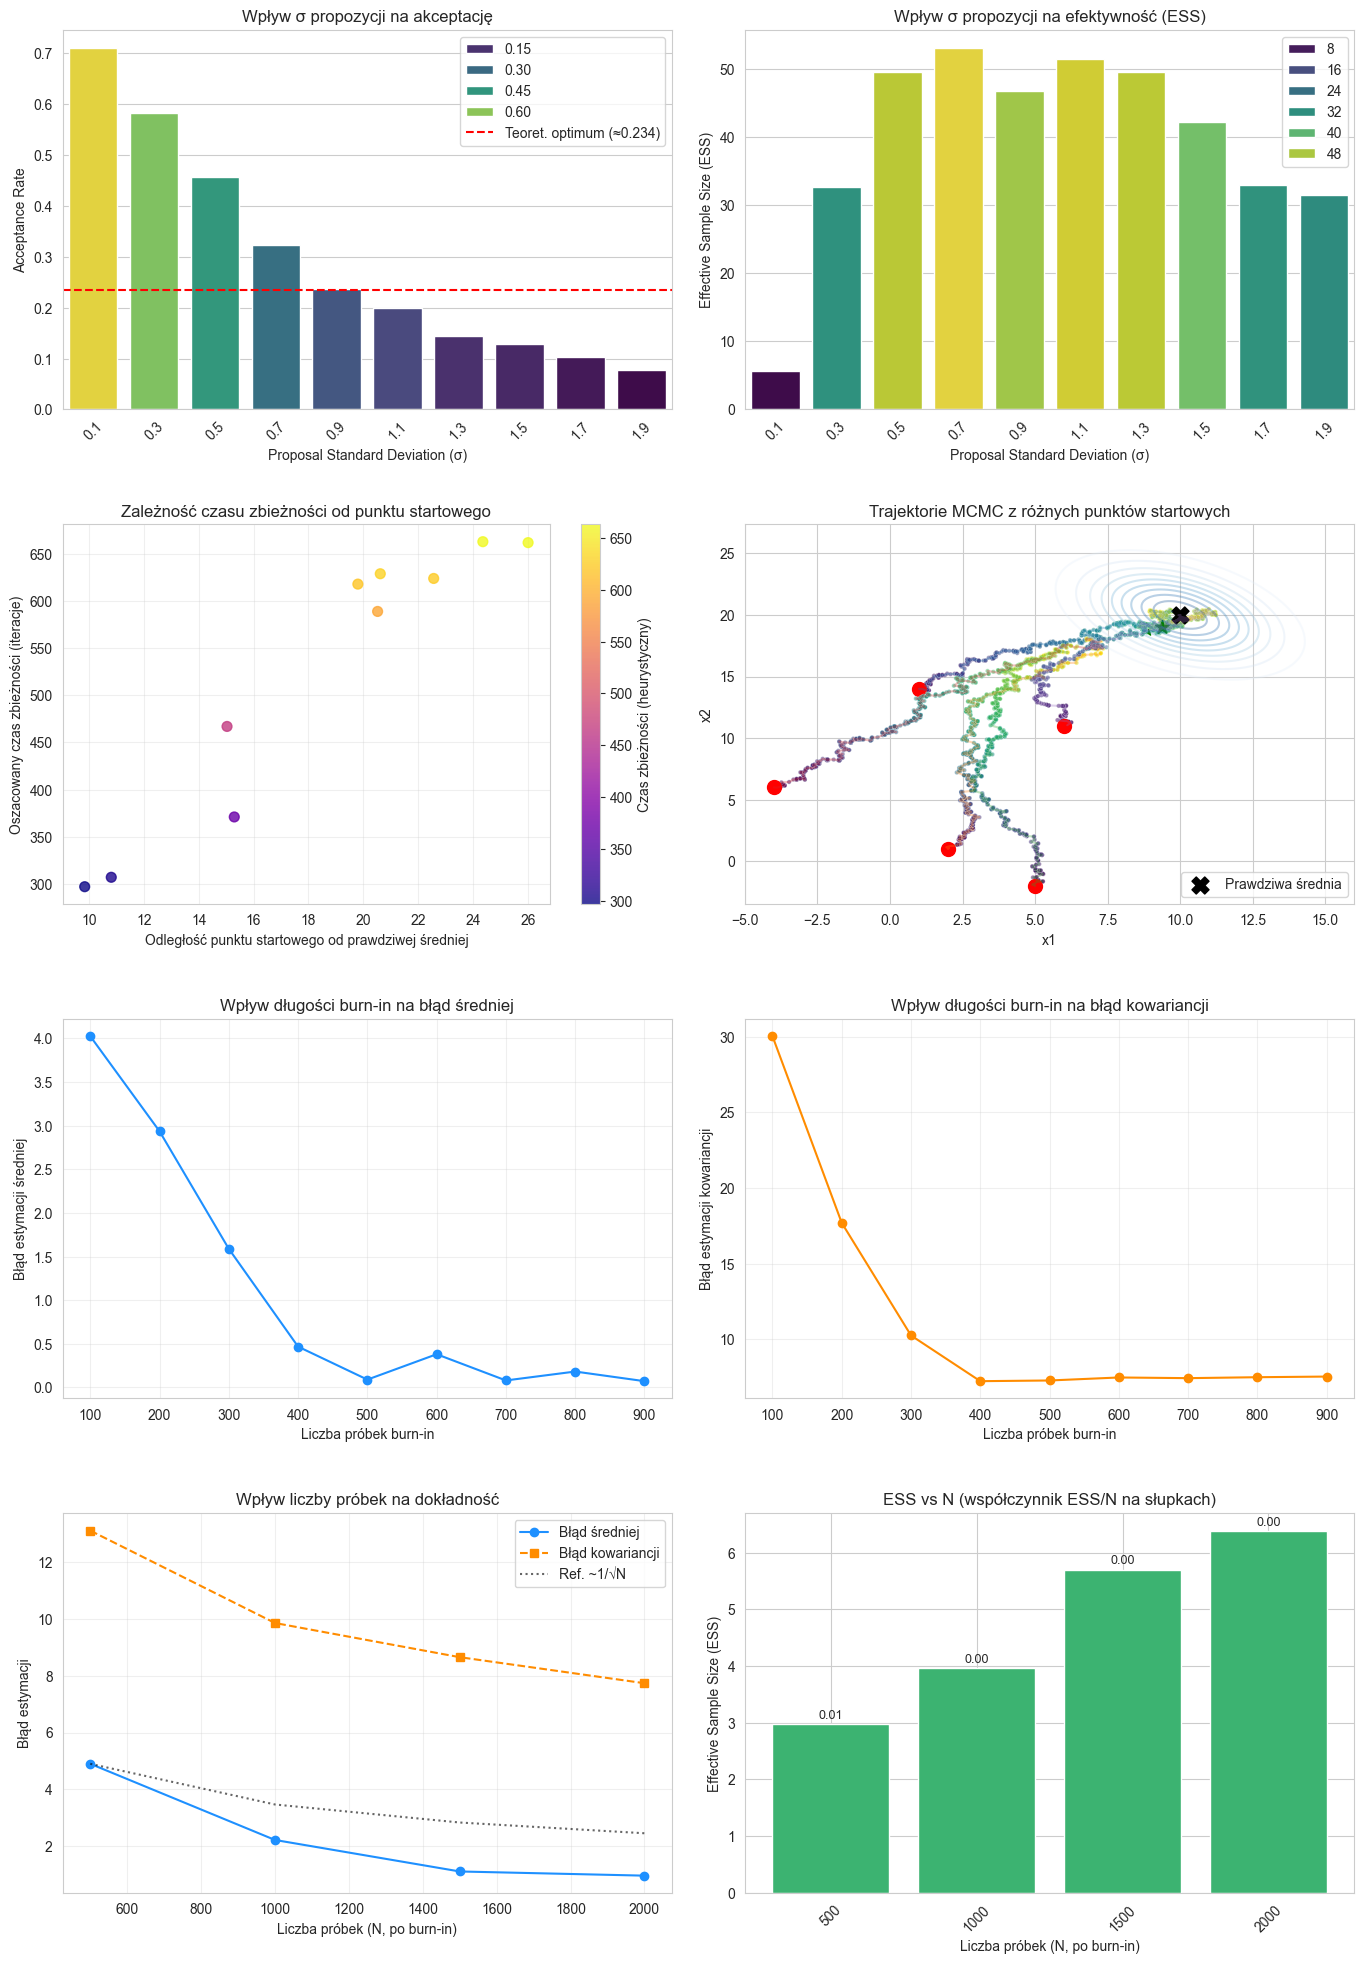

In [22]:
from src.plots import plot_mcmc_efficiency_results

plot_mcmc_efficiency_results(results, true_params, log_target_fn=log_gaussian_pdf, param_names=['x1', 'x2'])

# Zadanie 3 (1p.): Analiza i interpretacja wyników eksperymentów


W Zadaniu 2 przeprowadzono serię eksperymentów, badając wpływ różnych ustawień parametrów (`proposal_std`, `initial_x`, `n_burnin`, `n_samples`) na metryki takie jak stopa akceptacji, ESS, błędy estymacji czy czas zbieżności. Eksperymenty dotyczyły 2-wymiarowego Gaussa.

Twoim zadaniem jest teraz rozszerzenie analizy do wysokowymiarowego Gaussa, **zagłębienie się w wyniki, znalezienie co najmniej 2-3 interesujących obserwacji lub zależności i przedstawienie ich w klarowny sposób.**
Przenalizuj działanie algorytmu dla N=10, 100, 1000. Zastanów się jak dobrze przeanalizować i zwizualizować wysokowymiarowe dane.

1.  **Eksploracja Danych:** Przeanalizuj dane i poszukaj ciekawych wzorców, korelacji lub trade-offów. Co analizować?
    - Stopa akceptacji: Czy jest znacznie niższa? Jak zależy od proposal_std?
    - ESS: Czy ESS/N jest znacznie mniejsze niż w przypadku 2D?
    - Trace plots: Czy łańcuchy dobrze się mieszają dla wszystkich wymiarów?
    - Autokorelacja: Czy autokorelacja zanika wolniej?
    - Błędy estymacji: Czy potrzeba znacznie więcej próbek, aby uzyskać podobną dokładność jak w 2D?

2.  **Wizualizacja:** Wybierz **2 lub 3** najbardziej interesujące, Twoim zdaniem, obserwacje i stwórz dla każdej z nich **dedykowany wykres**, który najlepiej ilustruje daną zależność. Wykresy powinny być czytelne, poprawnie opisane (tytuł, etykiety osi, legenda jeśli potrzeba). Możesz użyć `matplotlib`, `seaborn` lub innej biblioteki. W jaki sposób zwizualizować wysokowymiarowe dane?

3.  **Wnioski:** Dla każdego stworzonego wykresu napisz **krótki (2-3 zdania) wniosek** podsumowujący zaobserwowaną zależność lub obserwację. Co ten wynik mówi nam o działaniu algorytmu Metropolis w kontekście badanego problemu i parametrów?

In [ ]:
import scipy.linalg


def create_highdim_gaussian_params(n_dim=20, rho=0.7):
    """
    Tworzy parametry dla wysokowymiarowego rozkładu Gaussa.

    Args:
        n_dim: Liczba wymiarów
        rho: Współczynnik korelacji między sąsiednimi wymiarami

    Returns:
        mu: Wektor średnich
        cov: Macierz kowariancji
        inv_cov: Odwrotność macierzy kowariancji lub None jeśli macierz nie jest dodatnio określona
    """
    mu = np.linspace(0, 5, n_dim)

    # Macierz kowariancji - struktura AR(1) / Toeplitza dla korelacji
    # Generuje macierz, gdzie cov[i,j] = rho^|i-j| * std_i * std_j
    std_devs = np.linspace(1.0, 2.0, n_dim)
    corr_matrix = scipy.linalg.toeplitz(rho**np.arange(n_dim))
    D_std = np.diag(std_devs)
    # Macierz kowariancji: C = D_std @ Correlation @ D_std
    cov = D_std @ corr_matrix @ D_std

    # Sprawdzenie dodatniej określoności (ważne!)
    try:
        np.linalg.cholesky(cov)
        print(f"Macierz kowariancji {n_dim}x{n_dim} jest dodatnio określona.")
        inv_cov = np.linalg.inv(cov)
    except np.linalg.LinAlgError:
        print(f"Błąd: Wygenerowana macierz kowariancji {n_dim}x{n_dim} nie jest dodatnio określona!")
        # W takim przypadku trzeba zmodyfikować parametry (np. zmniejszyć rho, zwiększyć wariancje)
        # lub dodać małą wartość do diagonali: cov += np.eye(n_dim) * 1e-6
        inv_cov = None # Nie kontynuuj bez poprawnej macierzy

    return mu, cov, inv_cov



Macierz kowariancji 10x10 jest dodatnio określona.
Acceptance rate: 0.778


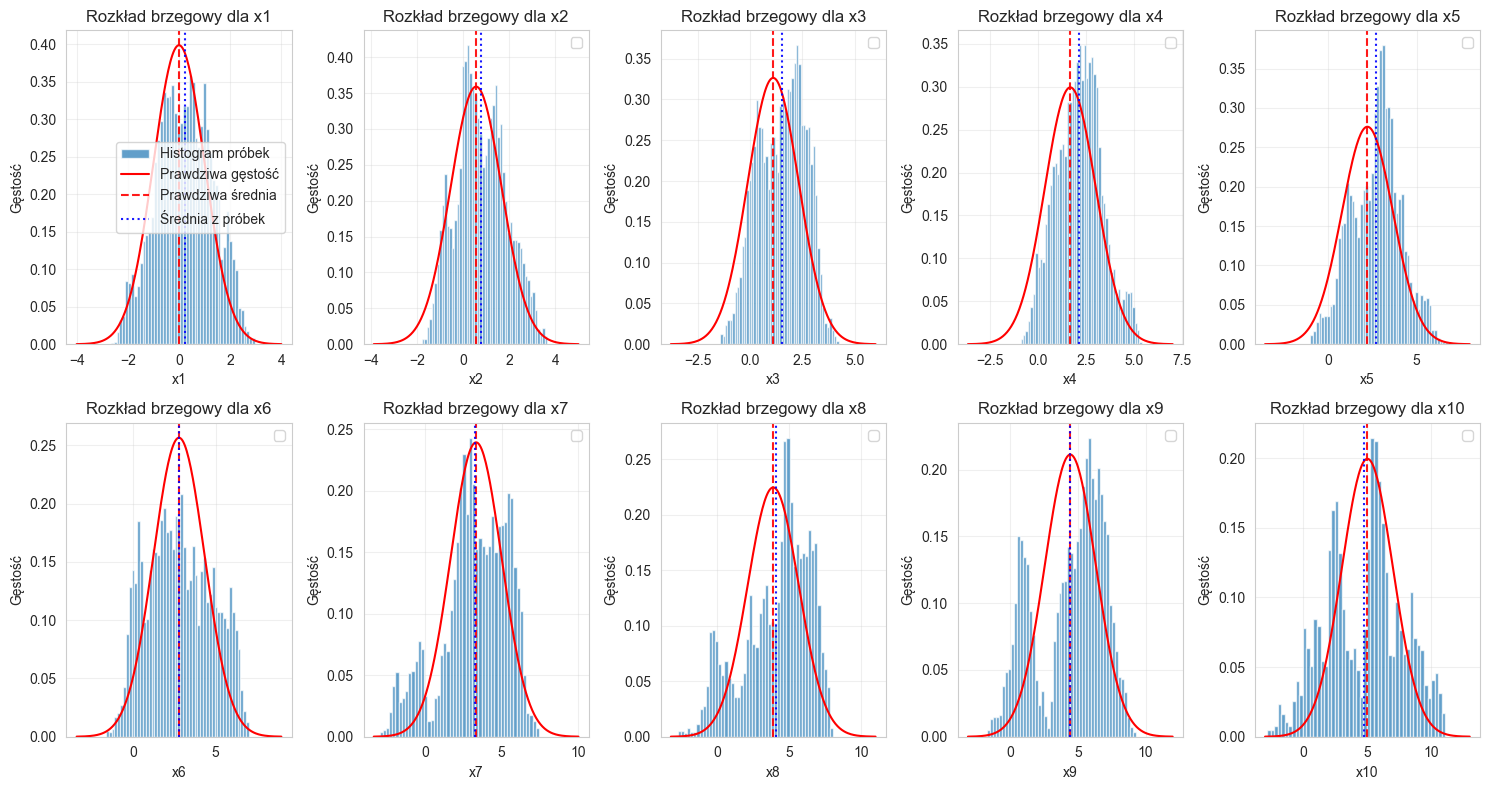

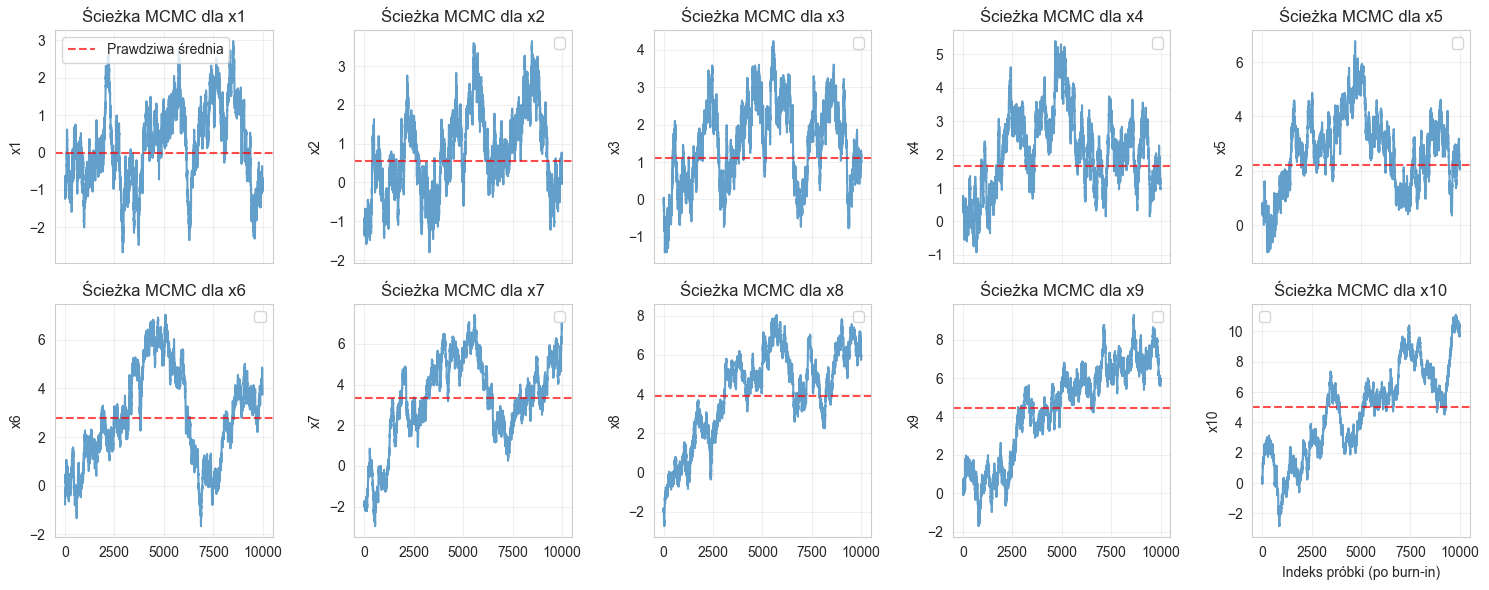

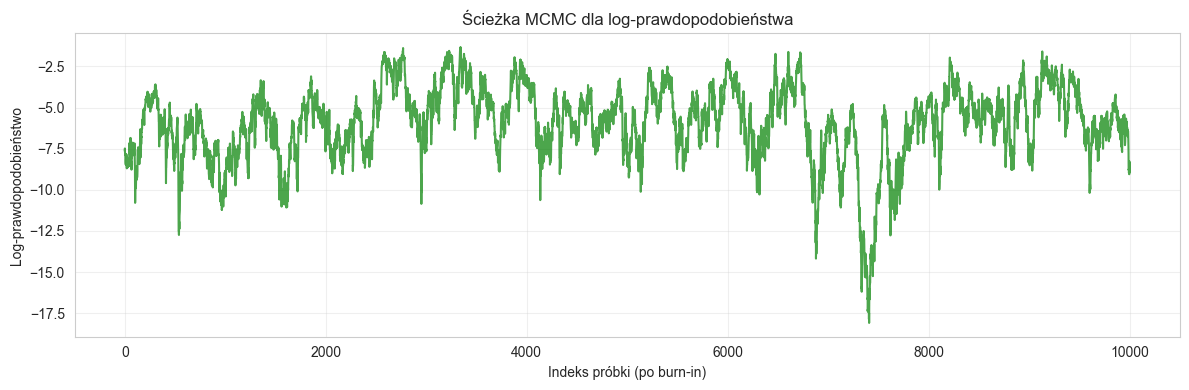

In [32]:
from src.plots import plot_marginal_histograms_grid, plot_traceplots_grid, plot_logprob_trace_highdim

def log_gaussian_pdf(x, mu, inv_cov):
    """
    Logarytm gęstości prawdopodobieństwa (do stałej) dla
    wielowymiarowego rozkładu normalnego.
    """
    diff = x - mu
    return -0.5 * diff.T @ inv_cov @ diff

N_DIM = 10

mu_highdim, cov_highdim, inv_cov_highdim = create_highdim_gaussian_params(N_DIM)
if inv_cov_highdim is None:
    raise ValueError("Macierz kowariancji nie jest dodatnio określona!")

initial_x_highdim = np.zeros(N_DIM)
proposal_std_highdim = np.ones(N_DIM) * 0.1

n_burnin_highdim = 1000
n_samples_highdim = 10000
param_names_highdim = [f'x{i+1}' for i in range(N_DIM)]

args_for_logprob_highdim = (mu_highdim, inv_cov_highdim)

samples_highdim_df, diagnostics = metropolis_sampler(
    log_target_fn=log_gaussian_pdf,
    initial_x=initial_x_highdim,
    proposal_std=proposal_std_highdim,
    n_samples=n_samples_highdim,
    n_burnin=n_burnin_highdim,
    param_names=param_names_highdim,
    args=args_for_logprob_highdim,
    return_diagnostics=True
)
print(f"Acceptance rate: {diagnostics.get('acceptance_rate', 'N/A'):.3f}")

plot_marginal_histograms_grid(samples_highdim_df, mu_highdim, param_names_highdim, cov_highdim, n_cols=5)
plot_traceplots_grid(samples_highdim_df, mu_highdim, param_names_highdim, n_cols=5)
plot_logprob_trace_highdim(samples_highdim_df)

## Twoja analiza

Krótki opis co zbadałeś
Zbadamy wpływ różnych wartości proposal_std i wymiarów na:
- stopa akceptacji,
- ESS/N,
- błędy estymacji średniej.

In [ ]:
dims = [10, 100, 1000]
all_results = {}

for D in dims:
    mu_D, cov_D, inv_cov_D = create_highdim_gaussian_params(n_dim=D, rho=0.7)
    if inv_cov_D is None:
        raise ValueError(f"Macierz kowariancji dla D={D} nie jest dodatnio określona!")
    
    param_ranges = {
        'proposal_std': np.arange(0.00001, 1, 0.2),
        'initial_x':   [np.random.rand(D)*10 for _ in range(10)],
        'n_burnin':     np.arange(100, 10000, 1000),
        'n_samples':    np.arange(500, 10000, 1500),
    }
    
    param_names = [f'x{i+1}' for i in range(D)]
    true_params = (mu_D, cov_D)
    args_for_logprob = (mu_D, inv_cov_D)
    
    results = analyze_mcmc_parameters(
        metropolis_sampler=metropolis_sampler,
        calculate_mean_error=calculate_mean_error,
        calculate_covariance_error=calculate_covariance_error,
        calculate_ess=calculate_ess,
        log_target_fn=log_gaussian_pdf,
        true_params=true_params,
        param_ranges=param_ranges,
        param_names=param_names,
        args=args_for_logprob
    )
    
    all_results[D] = results

Macierz kowariancji 10x10 jest dodatnio określona.
Rozpoczynanie testów dla 'proposal_std'...


Testowanie proposal_std: 100%|██████████| 5/5 [00:00<00:00,  6.18it/s]



Rozpoczynanie testów dla 'initial_x'...


Testowanie initial_x: 100%|██████████| 10/10 [00:01<00:00,  5.04it/s]



Rozpoczynanie testów dla 'n_burnin'...


Testowanie n_burnin: 100%|██████████| 10/10 [00:01<00:00,  5.30it/s]



Rozpoczynanie testów dla 'n_samples'...


Testowanie n_samples: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]



Zakończono analizę parametrów MCMC.
Macierz kowariancji 100x100 jest dodatnio określona.
Rozpoczynanie testów dla 'proposal_std'...


Testowanie proposal_std: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]



Rozpoczynanie testów dla 'initial_x'...


Testowanie initial_x: 100%|██████████| 10/10 [00:15<00:00,  1.58s/it]



Rozpoczynanie testów dla 'n_burnin'...


Testowanie n_burnin: 100%|██████████| 10/10 [00:16<00:00,  1.63s/it]



Rozpoczynanie testów dla 'n_samples'...


Testowanie n_samples: 100%|██████████| 7/7 [00:14<00:00,  2.06s/it]



Zakończono analizę parametrów MCMC.
Macierz kowariancji 1000x1000 jest dodatnio określona.
Rozpoczynanie testów dla 'proposal_std'...


Testowanie proposal_std: 100%|██████████| 5/5 [00:19<00:00,  3.99s/it]



Rozpoczynanie testów dla 'initial_x'...


Testowanie initial_x: 100%|██████████| 10/10 [00:53<00:00,  5.38s/it]



Rozpoczynanie testów dla 'n_burnin'...


Testowanie n_burnin: 100%|██████████| 10/10 [00:48<00:00,  4.84s/it]



Rozpoczynanie testów dla 'n_samples'...


Testowanie n_samples: 100%|██████████| 7/7 [01:12<00:00, 10.42s/it]


Zakończono analizę parametrów MCMC.


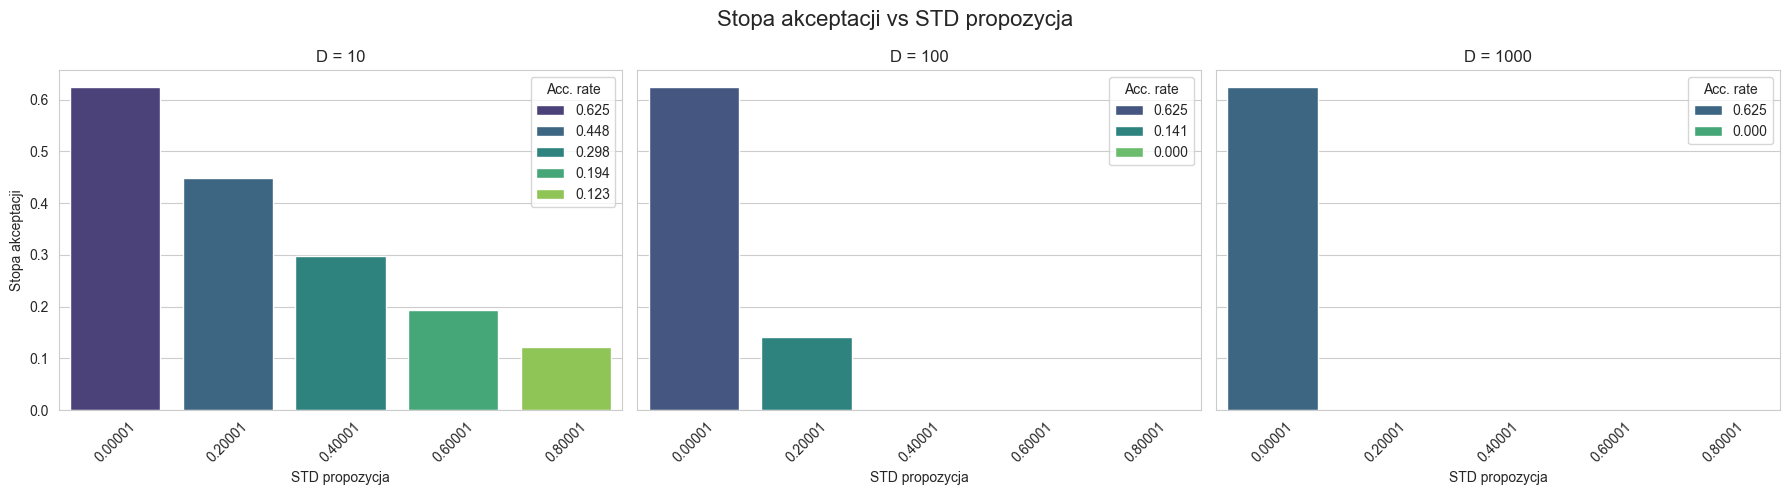

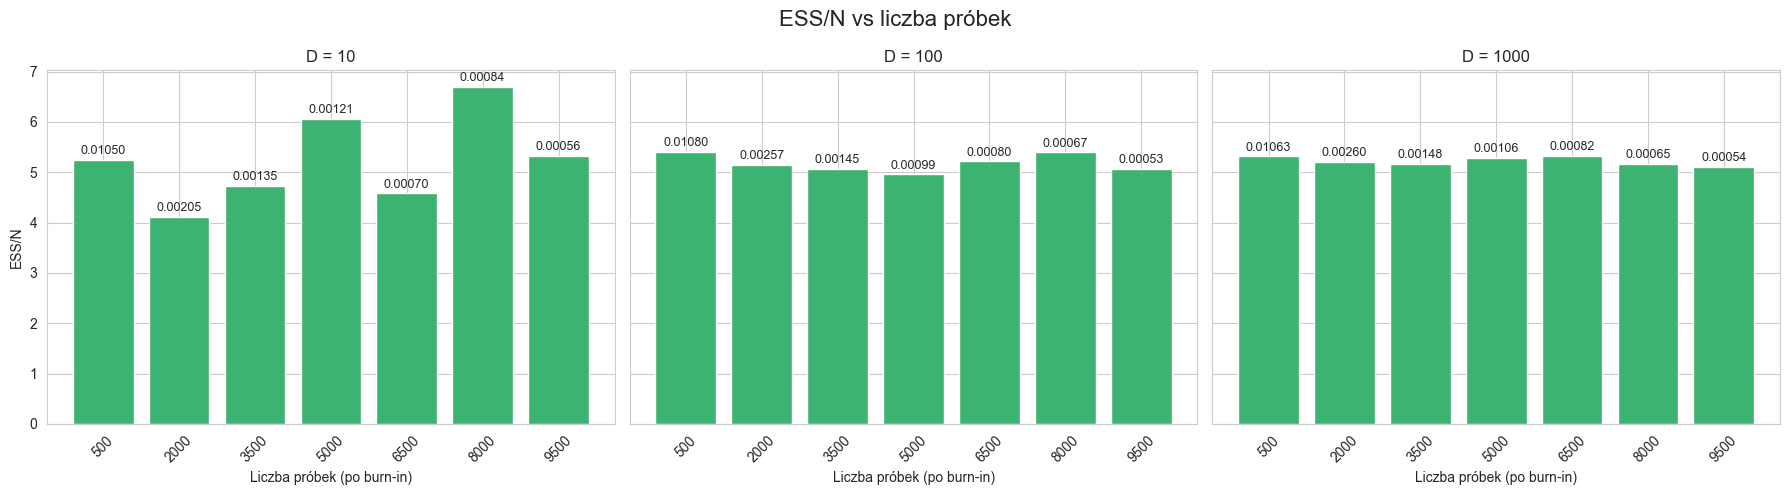

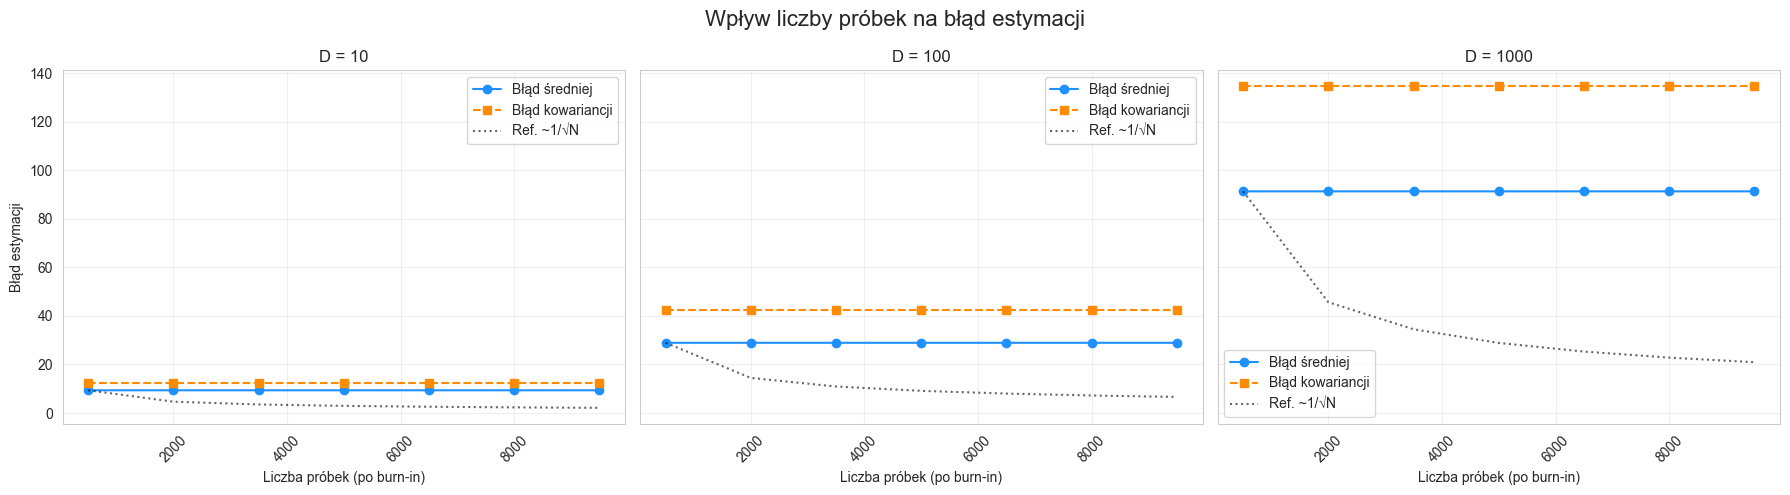

In [ ]:
fig1, axes1 = plt.subplots(1, len(dims), figsize=(18, 5), sharey=True)
for col, D in enumerate(dims):
    ax = axes1[col]
    res_std = all_results[D]['proposal_std']
    std_labels = [f"{s:.5f}" for s in res_std['values']]
    hue_labels = [f"{rate:.3f}" for rate in res_std['acceptance_rates']]

    sns.barplot(x=std_labels, y=res_std['acceptance_rates'], hue=hue_labels, palette="viridis", dodge=False, ax=ax)
    ax.set_title(f"D = {D}")
    ax.set_xlabel("STD propozycja")
    if col == 0:
        ax.set_ylabel("Stopa akceptacji")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Acc. rate", loc='upper right')

fig1.suptitle("Stopa akceptacji vs STD propozycja", fontsize=16)
fig1.tight_layout()

fig2, axes2 = plt.subplots(1, len(dims), figsize=(18, 5), sharey=True)
for col, D in enumerate(dims):
    ax = axes2[col]
    res_ns = all_results[D]['n_samples']
    samples_values = np.array(res_ns['values'])
    ess_values = np.array(res_ns['ess'])
    ess_ratio = ess_values / samples_values

    bars = ax.bar([f"{n}" for n in samples_values], ess_values, color='mediumseagreen')
    labels = [f"{e:.5f}" for e in ess_ratio]
    ax.bar_label(bars, labels, fmt="%.5f", padding=2, fontsize=9)

    ax.set_title(f"D = {D}")
    ax.set_xlabel("Liczba próbek (po burn-in)")
    if col == 0:
        ax.set_ylabel("ESS/N")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

fig2.suptitle("ESS/N vs liczba próbek", fontsize=16)
fig2.tight_layout()

fig3, axes3 = plt.subplots(1, len(dims), figsize=(18, 5), sharey=True)
for col, D in enumerate(dims):
    ax = axes3[col]
    res_ns = all_results[D]['n_samples']
    samples_values = np.array(res_ns['values'])
    mean_errors = np.array(res_ns['mean_errors'])
    cov_errors = np.array(res_ns['cov_errors'])
    ax.plot(samples_values, mean_errors, 'o-', color='dodgerblue',   label='Błąd średniej')
    ax.plot(samples_values, cov_errors, 's--', color='darkorange',  label='Błąd kowariancji')
    
    valid = ~np.isnan(mean_errors) & (mean_errors > 0)
    if valid.any():
        i0 = np.where(valid)[0][0]
        ref_curve = mean_errors[i0] * np.sqrt(samples_values[i0] / samples_values)
        ax.plot(samples_values, ref_curve, 'k:', alpha=0.6, label='Ref. ~1/√N')
    
    ax.set_title(f"D = {D}")
    ax.set_xlabel("Liczba próbek (po burn-in)")
    if col == 0:
        ax.set_ylabel("Błąd estymacji")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

fig3.suptitle("Wpływ liczby próbek na błąd estymacji", fontsize=16)
fig3.tight_layout()
plt.show()

In [ ]:
proposal_list = [0.1, 1.2/1000]
records = []
dims = [10, 100, 1000]
n_burnin = 10000
n_samples = 10000

for sigma, dim in product(proposal_list, dims):
    mu, cov, inv_cov = create_highdim_gaussian_params(dim)

    samples, diag = metropolis_sampler(
        log_target_fn=log_gaussian_pdf,
        initial_x=np.zeros(dim),
        proposal_std=np.full(dim, sigma),
        n_burnin=n_burnin,
        n_samples=n_samples,
        param_names=[f"x{i}" for i in range(dim)],
        args=(mu, inv_cov),
        return_diagnostics=True)

    ess = [calculate_ess(samples[col].values) for col in samples.columns[:-1]]

    records.append({
        "proposal_std": sigma,
        "dim": dim,
        "accept_rate": diag["acceptance_rate"],
        "ess_mean": np.mean(ess),
        "ess_mean_ratio": np.mean(ess) / n_samples,
        "mean_err": calculate_mean_error(samples, mu, samples.columns[:-1])
    })
df_all = (pd.DataFrame(records).set_index(["proposal_std", "dim"]).sort_index(level=["proposal_std", "dim"]))
display(df_all)

Macierz kowariancji 10x10 jest dodatnio określona.
Macierz kowariancji 100x100 jest dodatnio określona.
Macierz kowariancji 1000x1000 jest dodatnio określona.
Macierz kowariancji 10x10 jest dodatnio określona.
Macierz kowariancji 100x100 jest dodatnio określona.
Macierz kowariancji 1000x1000 jest dodatnio określona.


accept_rate  ess_mean  ess_mean_ratio   mean_err
proposal_std dim                                                   
0.0012       10        0.49940  5.249101        0.000525   9.525753
             100       0.49935  5.222633        0.000522  29.084468
             1000      0.49740  5.245820        0.000525  91.224038
0.1000       10        0.42780  8.834046        0.000883   1.406215
             100       0.27320  8.328322        0.000833   5.953250
             1000      0.01975  5.971202        0.000597  87.006715

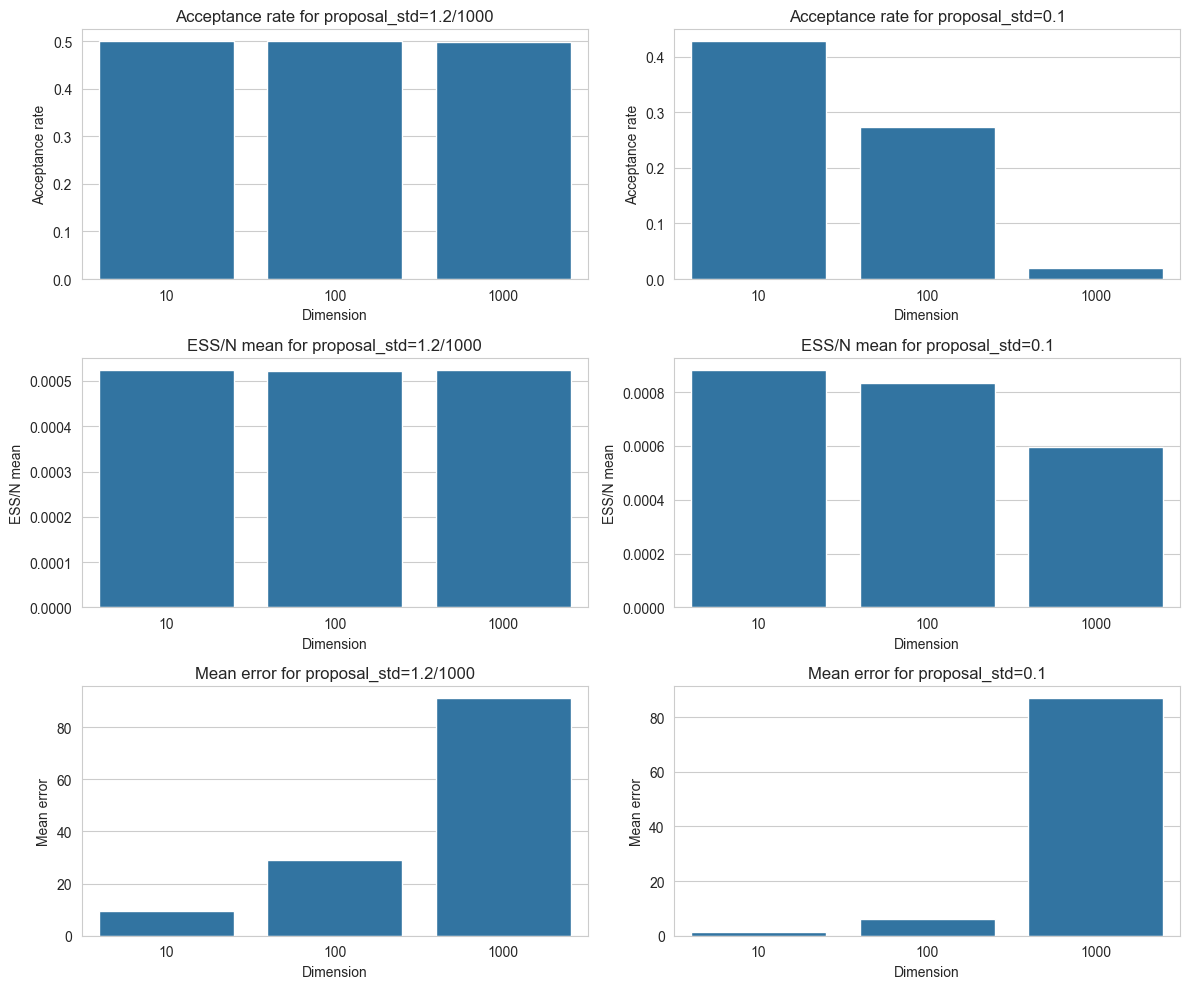

In [ ]:
df_1 = df_all.loc[1.2/1000]
df_2 = df_all.loc[0.1]

fig, ax = plt.subplots(3, 2, figsize=(12, 10))
sns.barplot(data=df_1.reset_index(), x="dim", y="accept_rate", ax=ax[0, 0])
ax[0, 0].set_title("Acceptance rate for proposal_std=1.2/1000")
ax[0, 0].set_xlabel("Dimension")
ax[0, 0].set_ylabel("Acceptance rate")
sns.barplot(data=df_2.reset_index(), x="dim", y="accept_rate", ax=ax[0, 1])
ax[0, 1].set_title("Acceptance rate for proposal_std=0.1")
ax[0, 1].set_xlabel("Dimension")
ax[0, 1].set_ylabel("Acceptance rate")
sns.barplot(data=df_1.reset_index(), x="dim", y="ess_mean_ratio", ax=ax[1, 0])
ax[1, 0].set_title("ESS/N mean for proposal_std=1.2/1000")
ax[1, 0].set_xlabel("Dimension")
ax[1, 0].set_ylabel("ESS/N mean")
sns.barplot(data=df_2.reset_index(), x="dim", y="ess_mean_ratio", ax=ax[1, 1])
ax[1, 1].set_title("ESS/N mean for proposal_std=0.1")
ax[1, 1].set_xlabel("Dimension")
ax[1, 1].set_ylabel("ESS/N mean")
sns.barplot(data=df_1.reset_index(), x="dim", y="mean_err", ax=ax[2, 0])
ax[2, 0].set_title("Mean error for proposal_std=1.2/1000")
ax[2, 0].set_xlabel("Dimension")
ax[2, 0].set_ylabel("Mean error")
sns.barplot(data=df_2.reset_index(), x="dim", y="mean_err", ax=ax[2, 1])
ax[2, 1].set_title("Mean error for proposal_std=0.1")
ax[2, 1].set_xlabel("Dimension")
ax[2, 1].set_ylabel("Mean error")
plt.tight_layout()
plt.show()

### Wnioski

- Stopa akceptacji

Wraz ze wzrotem odchylenia standardowego, acceptance_rate spada. Dla dużych $\sigma$ propozycje zazwyczaj są odrzucane. Dodatkowo, przy stałym $\sigma$ przejście od wymiaru 10 do 1000 powoduje ogromny spadek akceptacji, co sugeruje, że w przestrzeniach wysokowymiarowych kroki musi być sklaowany.

- ESS/N

Współczynnik ESS/N dla każdego wymiaru pozostaje mniej więcej stały niezależnie od liczby próbek $N$ (podobnie jak w przypadku 2D). Jednak wraz ze wzrostem wymiaru $D$ wartość ESS/N spada, co świadczy o silniejsze autokorelacji w łańcuchu.

- Wpływ liczby próbek na błąd estymacji

Błąd estymacji średniej i kowariancji maleje bardzo wolno w miarę wzrostu liczby próbek. Zapewne wymaga to o wiele więcej próbek, aby uzyskać podobną dokładność jak w przypadku 2D. Możemy zauważyć również, że błąd estymacji średniej wraz ze wzrostem wymiaru rośnie.